### IMPORTS

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### LOAD IMAGES

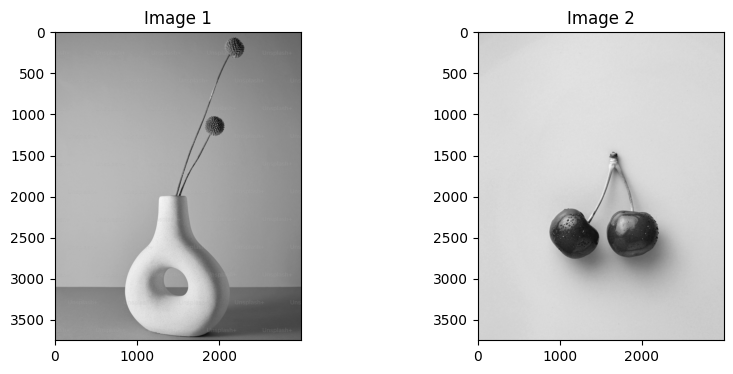

In [23]:
img1 = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)  # Replace with your path
img2 = cv2.imread('image2.jpg', cv2.IMREAD_GRAYSCALE)

if img1 is None or img2 is None:
    raise FileNotFoundError("One or both image paths are incorrect.")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray')
plt.title('Image 1')
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray')
plt.title('Image 2')
plt.show()

### RANSAC Algorithm

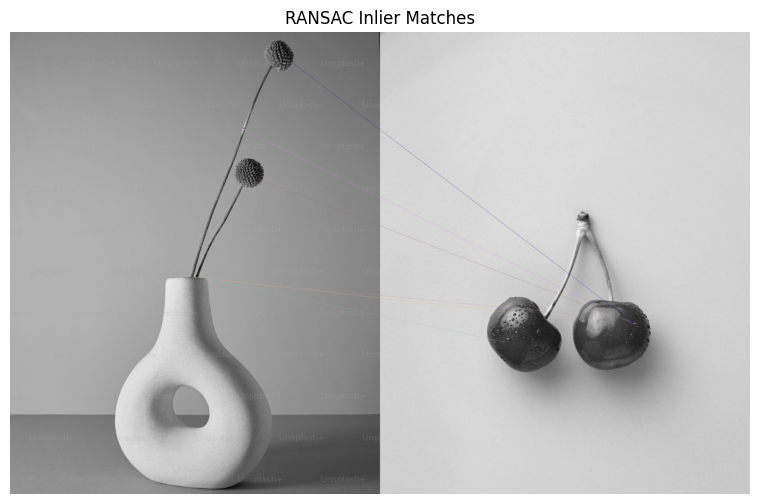

In [25]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Extract location of good matches
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

# RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)
inlier_matches = [m for i, m in enumerate(matches) if mask[i]]

# Draw matches
img_matches = cv2.drawMatches(img1, kp1, img2, kp2, inlier_matches, None, flags=2)
plt.figure(figsize=(15, 6))
plt.imshow(img_matches)
plt.title("RANSAC Inlier Matches")
plt.axis('off')
plt.show()


### Harris Corner Detection

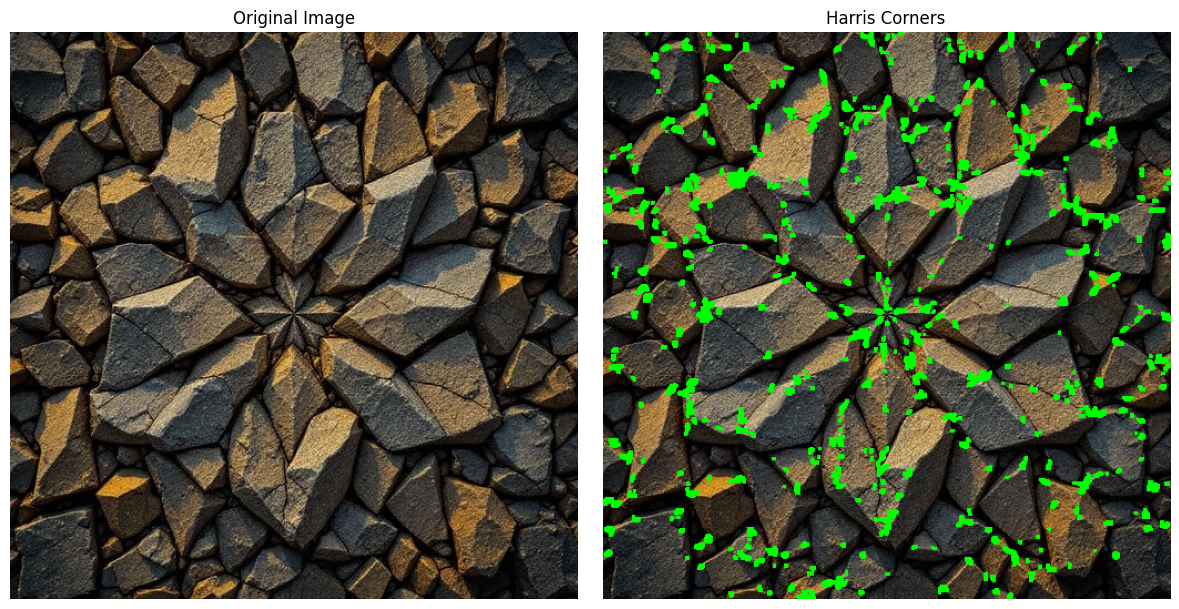

In [58]:
img = cv2.imread('image3.jpg')
original_img = img.copy()  

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, blockSize=5, ksize=15, k=0.075)
dst = cv2.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 255, 0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners')
plt.axis('off')

plt.tight_layout()
plt.show()


### Shi-Tomasi Corner Detection

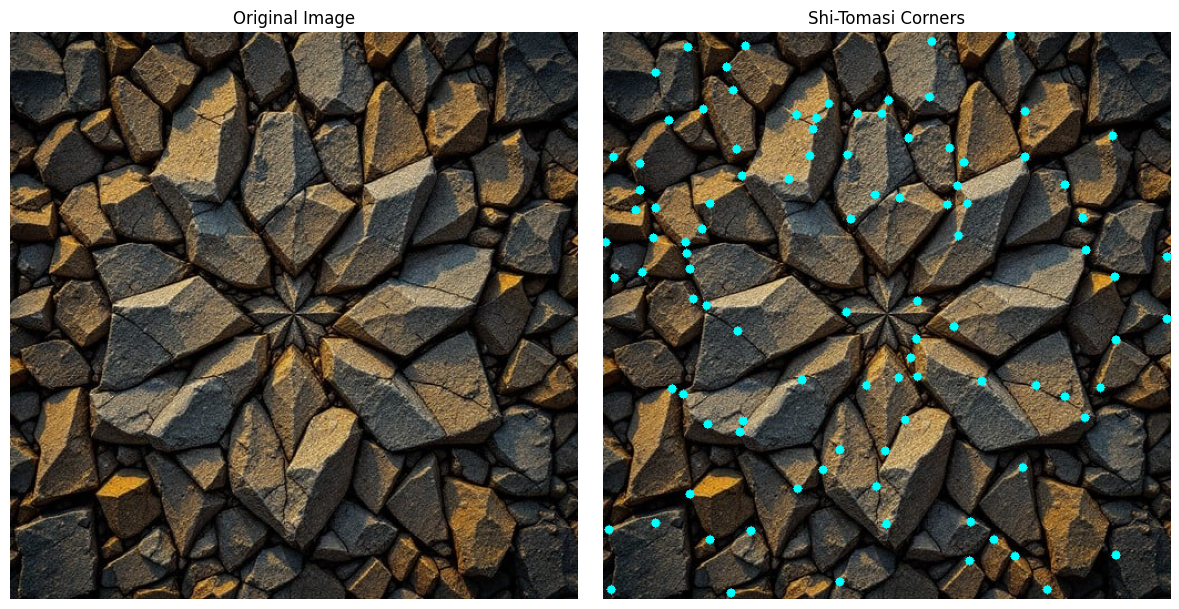

In [65]:
img = cv2.imread('image3.jpg')
original_img = img.copy() 

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.005, minDistance=10)
corners = corners.astype(int)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 4, (255, 255, 0), -1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Shi-Tomasi Corners")
plt.axis('off')

plt.tight_layout()
plt.show()
